This file takes the merged dataframe of ACS Data and NPI information for EDA


In [96]:
### Install if needed
# !pip install pgeocode
# !pip install censusgeocode

### Import Libraries 
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pgeocode as pg       #might not need here
import censusgeocode as cg  #might not need here

In [97]:
### Import mergedTable
mergedTable = pd.read_pickle('mergedTable.pkl')
# mergedTable.head()

In [98]:
### Import Census Tract Boundaries
tracts = gpd.read_file('Colorado_Census_Tract_Boundaries.geojson')
# tracts

In [99]:
### Add additional information to FIPS to match mergedTable and rename column
tracts['FIPS'] = '1400000US' + tracts['FIPS']
tracts = tracts.rename(columns={'FIPS': 'GEO_ID'})
# tracts 

In [100]:
### Add Census Boundaries to mergedTable
mergedTableBounds = pd.merge(tracts, mergedTable, on = 'GEO_ID', how = 'right')
mergedTableBounds.head(3) 

,OBJECTID,GEO_ID,geometry,Provider Count,householdIncomeBins,hsDegreeBins,marriedBins,cohabitingBins,maleHouseholderBins,femaleHouseholderBins,...,separatedBins,widowedBins,divorcedBins,nativeBornBins,foreignBornBins,civilVetBins,belowPovertyBins,atOrAbovePovertyBins,65andOverBins,75andOverBins
0,572,1400000US08005006857,"POLYGON ((-104.88766 39.61374, -104.88753 39.6...",2,Very High,Very High,Very High,Very Low,Medium,Very Low,...,Medium,Very Low,Very Low,Very Low,Very High,Medium,Very Low,Very High,Very High,Very High
1,473,1400000US08031006816,"POLYGON ((-104.91322 39.64395, -104.91335 39.6...",1,Very Low,Medium,Low,High,Very High,Medium,...,Low,High,Very High,Low,High,Very High,High,Low,Very High,Very High
2,33,1400000US08101002919,"POLYGON ((-104.64717 38.31210, -104.64720 38.3...",1,Low,Low,Low,High,Low,Very High,...,Very High,High,Low,Medium,Medium,Medium,Low,High,High,High


Update columns for Correlation Mapping

In [101]:
corrDF = mergedTableBounds.copy()
corrDF = corrDF.drop(columns=['OBJECTID', 'GEO_ID', 'geometry'])

ordinalMap = {'Very Low': 1, 'Low': 2, 'Medium': 3, 'High': 4, 'Very High': 5}

binColumns = [col for col in corrDF.columns if col.endswith('Bins')]
for col in binColumns:
    corrDF[col] = corrDF[col].replace(ordinalMap).astype(float)

corrDF = corrDF.dropna()

Correlation Map

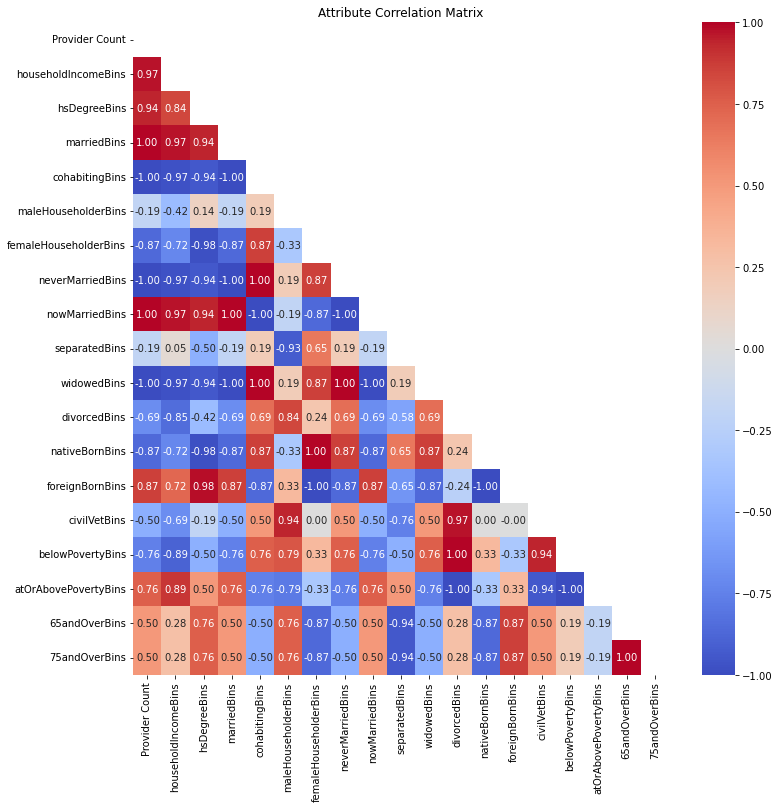

In [102]:
corrMatrix = corrDF.corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
plt.figure(figsize=(12,12))
sns.heatmap(corrMatrix, mask = mask, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Attribute Correlation Matrix')
plt.show()

In [103]:
corrMatrix

,Provider Count,householdIncomeBins,hsDegreeBins,marriedBins,cohabitingBins,maleHouseholderBins,femaleHouseholderBins,neverMarriedBins,nowMarriedBins,separatedBins,widowedBins,divorcedBins,nativeBornBins,foreignBornBins,civilVetBins,belowPovertyBins,atOrAbovePovertyBins,65andOverBins,75andOverBins
Provider Count,1.000000,0.970725,0.944911,1.000000,-1.000000,-0.188982,-8.660254e-01,-1.000000,1.000000,-0.188982,-1.000000,-0.693375,-8.660254e-01,8.660254e-01,-5.000000e-01,-0.755929,0.755929,0.500000,0.500000
householdIncomeBins,0.970725,1.000000,0.838628,0.970725,-0.970725,-0.419314,-7.205767e-01,-0.970725,0.970725,0.052414,-0.970725,-0.846154,-7.205767e-01,7.205767e-01,-6.933752e-01,-0.891042,0.891042,0.277350,0.277350
hsDegreeBins,0.944911,0.838628,1.000000,0.944911,-0.944911,0.142857,-9.819805e-01,-0.944911,0.944911,-0.500000,-0.944911,-0.419314,-9.819805e-01,9.819805e-01,-1.889822e-01,-0.500000,0.500000,0.755929,0.755929
marriedBins,1.000000,0.970725,0.944911,1.000000,-1.000000,-0.188982,-8.660254e-01,-1.000000,1.000000,-0.188982,-1.000000,-0.693375,-8.660254e-01,8.660254e-01,-5.000000e-01,-0.755929,0.755929,0.500000,0.500000
cohabitingBins,-1.000000,-0.970725,-0.944911,-1.000000,1.000000,0.188982,8.660254e-01,1.000000,-1.000000,0.188982,1.000000,0.693375,8.660254e-01,-8.660254e-01,5.000000e-01,0.755929,-0.755929,-0.500000,-0.500000
maleHouseholderBins,-0.188982,-0.419314,0.142857,-0.188982,0.188982,1.000000,-3.273268e-01,0.188982,-0.188982,-0.928571,0.188982,0.838628,-3.273268e-01,3.273268e-01,9.449112e-01,0.785714,-0.785714,0.755929,0.755929
femaleHouseholderBins,-0.866025,-0.720577,-0.981981,-0.866025,0.866025,-0.327327,1.000000e+00,0.866025,-0.866025,0.654654,0.866025,0.240192,1.000000e+00,-1.000000e+00,9.614813e-17,0.327327,-0.327327,-0.866025,-0.866025
neverMarriedBins,-1.000000,-0.970725,-0.944911,-1.000000,1.000000,0.188982,8.660254e-01,1.000000,-1.000000,0.188982,1.000000,0.693375,8.660254e-01,-8.660254e-01,5.000000e-01,0.755929,-0.755929,-0.500000,-0.500000
nowMarriedBins,1.000000,0.970725,0.944911,1.000000,-1.000000,-0.188982,-8.660254e-01,-1.000000,1.000000,-0.188982,-1.000000,-0.693375,-8.660254e-01,8.660254e-01,-5.000000e-01,-0.755929,0.755929,0.500000,0.500000
separatedBins,-0.188982,0.052414,-0.500000,-0.188982,0.188982,-0.928571,6.546537e-01,0.188982,-0.188982,1.000000,0.188982,-0.576557,6.546537e-01,-6.546537e-01,-7.559289e-01,-0.500000,0.500000,-0.944911,-0.944911


In [113]:
### I don't want to see correlations between items from the same table
excludedGroups = [
    {'marriedBins', 'cohabitingBins', 'maleHouseholderBins', 'femaleHouseholderBins', 'neverMarriedBins', 'nowMarriedBins',	'separatedBins', 'widowedBins', 'divorcedBins'},
	{'nativeBornBins', 'foreignBornBins'},
	{'belowPovertyBins', 'atOrAbovePovertyBins'},
	{'65andOverBins', '75andOverBins'}
]

def excludedPairs(col1, col2):
    for group in excludedGroups:
        if col1 in group and col2 in group:
            return True
    return False


In [116]:
### Build correlation DF
corrPairs = corrMatrix.unstack().reset_index()
corrPairs.columns = ['Var 1', 'Var 2', 'Correlation']
corrPairs = corrPairs[corrPairs['Var 1'] != corrPairs['Var 2']]

## Avoid duplicates like (A,B) and (B,A) 
corrPairs['Pair'] = corrPairs.apply(lambda row: tuple(sorted([row['Var 1'], row['Var 2']])), axis=1)
corrPairs = corrPairs.drop_duplicates('Pair')

## Fliter out excluded pairs
corrPairs = corrPairs[~corrPairs['Pair'].apply(lambda x: excludedPairs(*x))]

## Calculate abs and sort
corrPairs['AbsCorr'] = corrPairs['Correlation'].abs()
sortedCorrPairs = corrPairs.sort_values(by = 'AbsCorr', ascending=False).round(2)

sortedCorrPairs.head(75)

,Var 1,Var 2,Correlation,Pair,AbsCorr
126,femaleHouseholderBins,nativeBornBins,1.00,"(femaleHouseholderBins, nativeBornBins)",1.00
10,Provider Count,widowedBins,-1.00,"(Provider Count, widowedBins)",1.00
3,Provider Count,marriedBins,1.00,"(Provider Count, marriedBins)",1.00
4,Provider Count,cohabitingBins,-1.00,"(Provider Count, cohabitingBins)",1.00
7,Provider Count,neverMarriedBins,-1.00,"(Provider Count, neverMarriedBins)",1.00
...,...,...,...,...,...
168,nowMarriedBins,atOrAbovePovertyBins,0.76,"(atOrAbovePovertyBins, nowMarriedBins)",0.76
185,separatedBins,civilVetBins,-0.76,"(civilVetBins, separatedBins)",0.76
32,householdIncomeBins,foreignBornBins,0.72,"(foreignBornBins, householdIncomeBins)",0.72
31,householdIncomeBins,nativeBornBins,-0.72,"(householdIncomeBins, nativeBornBins)",0.72


Mapping

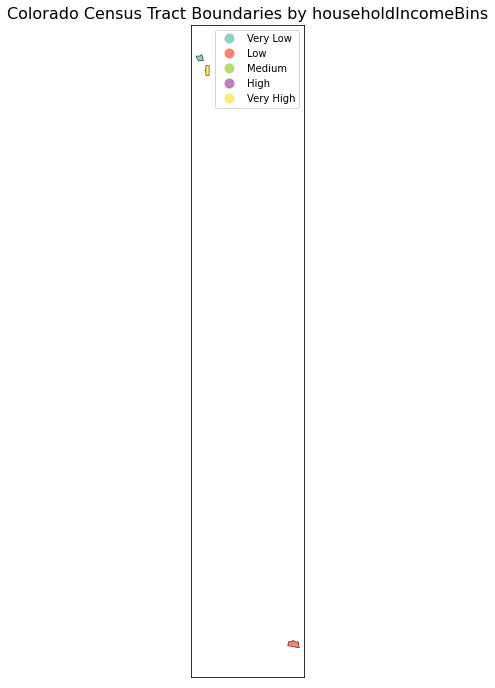

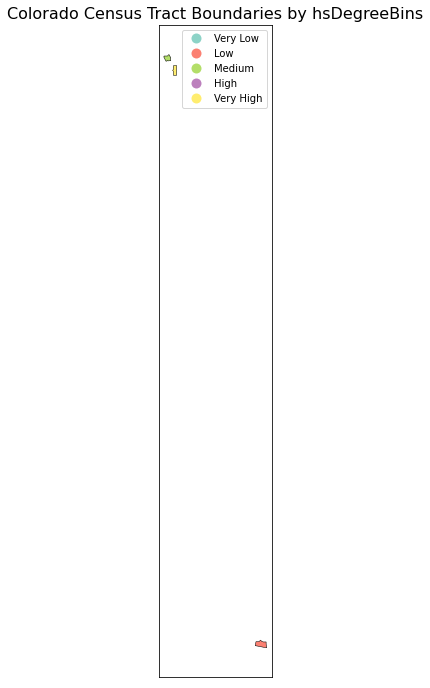

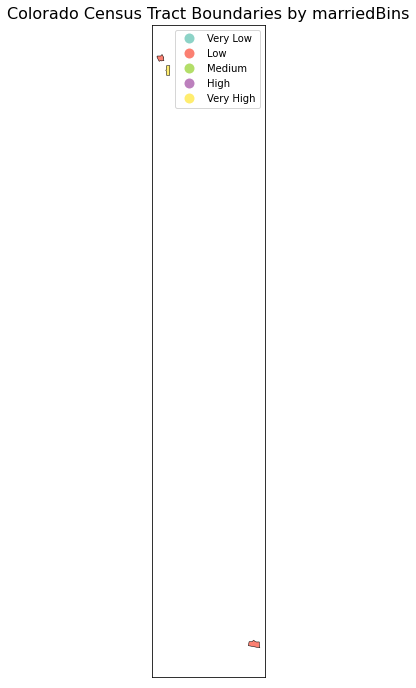

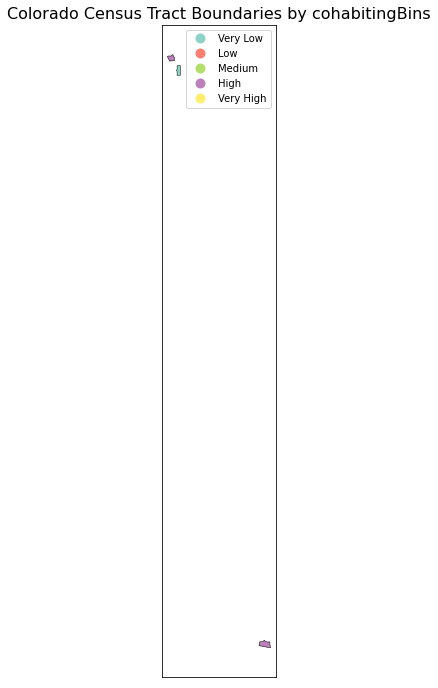

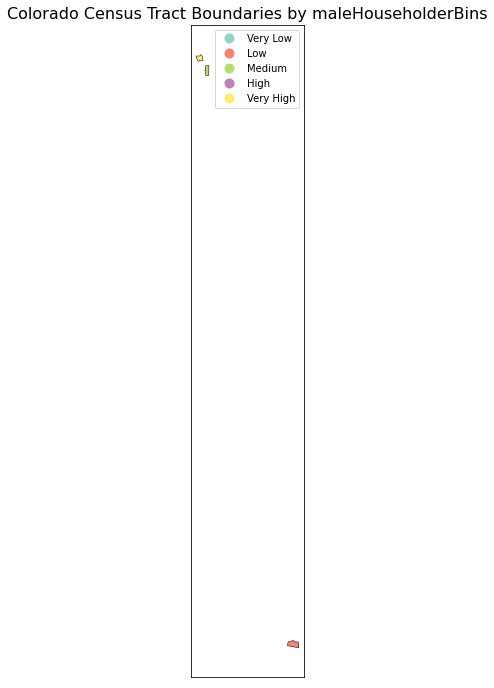

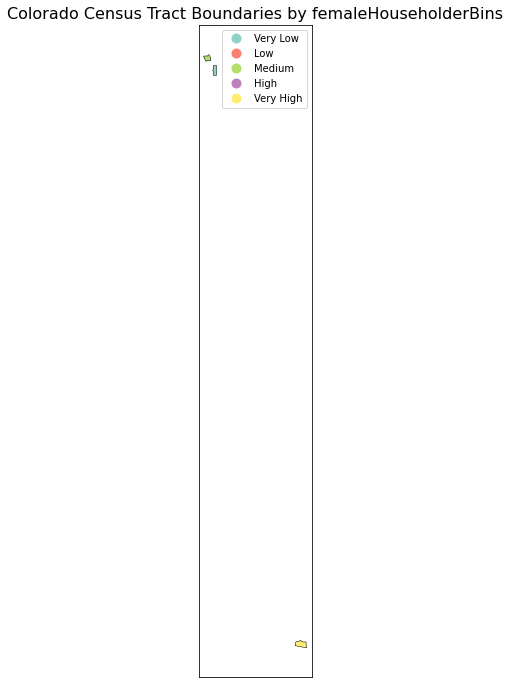

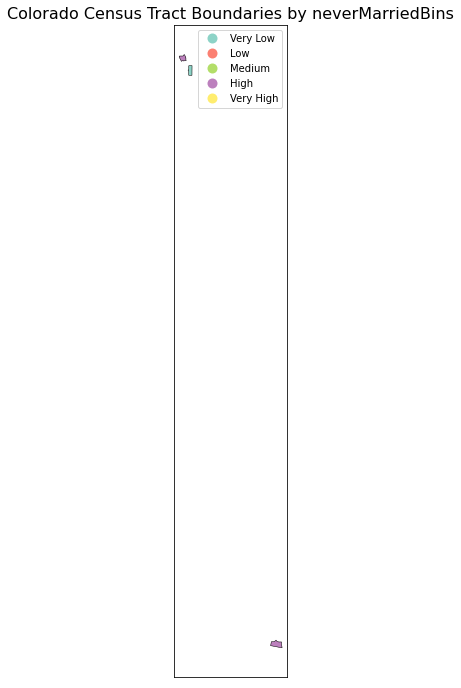

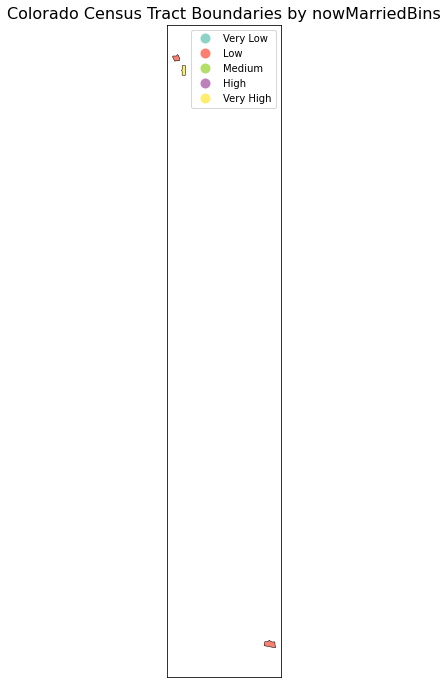

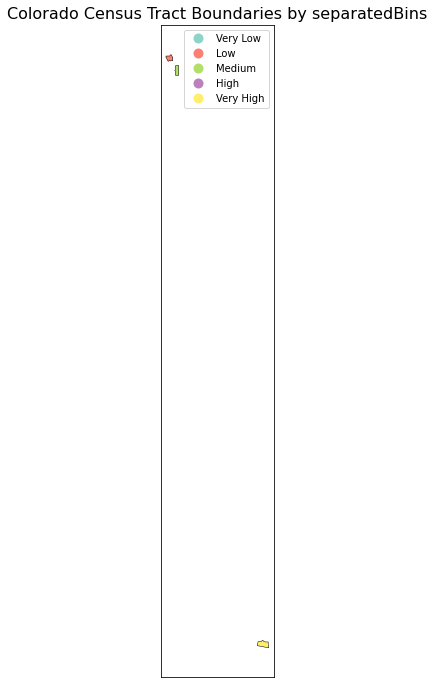

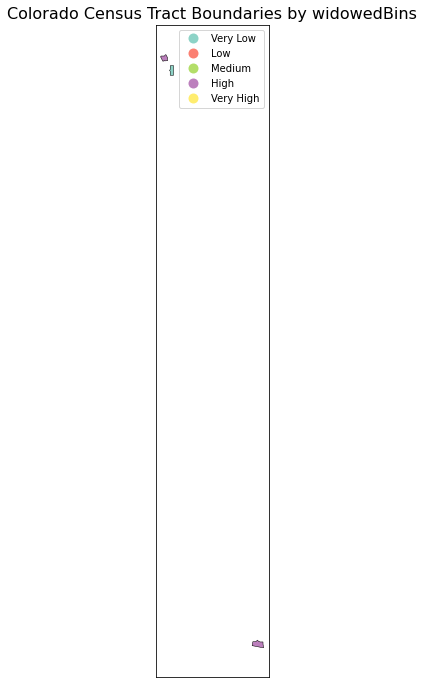

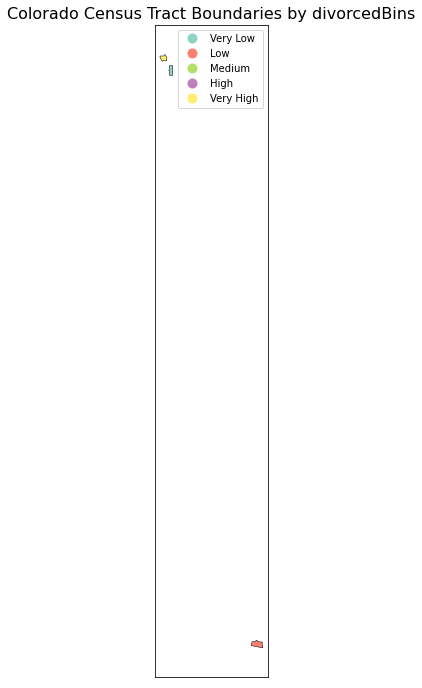

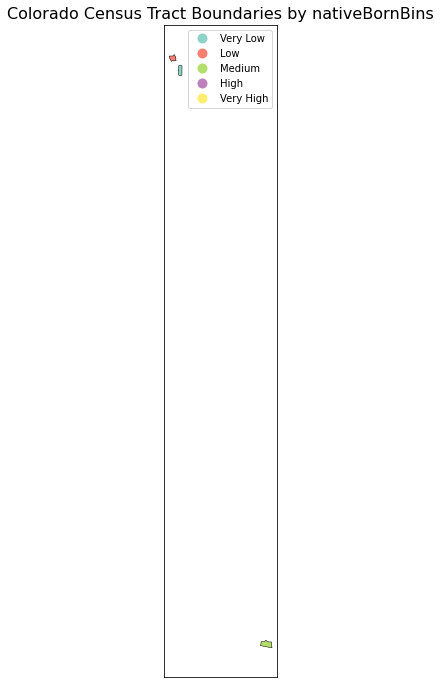

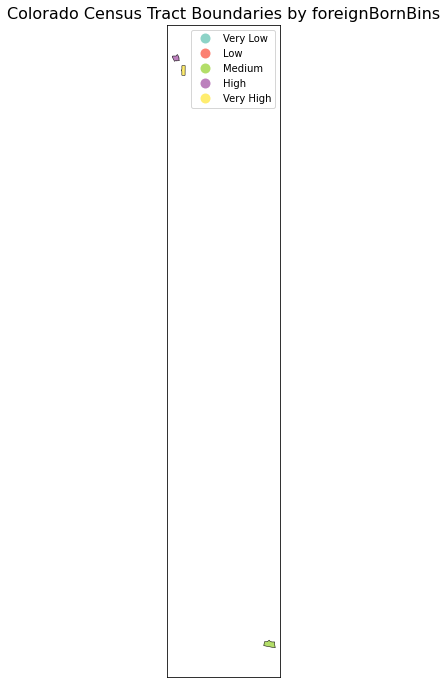

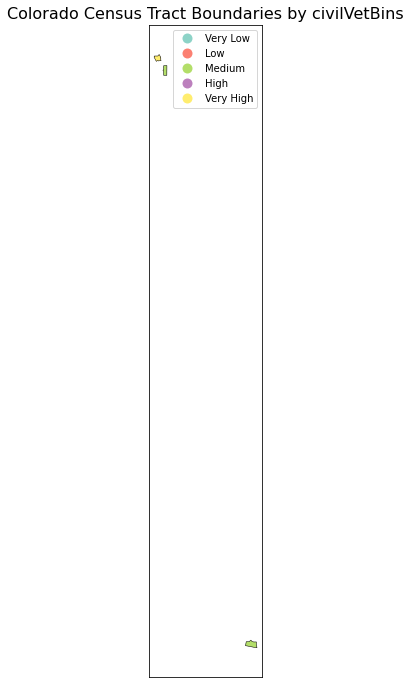

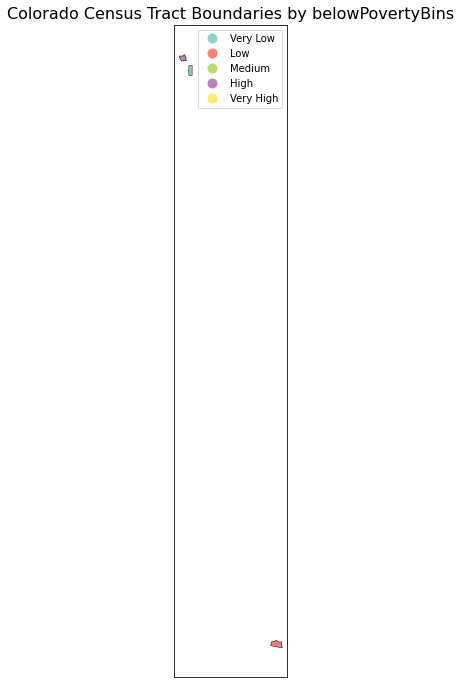

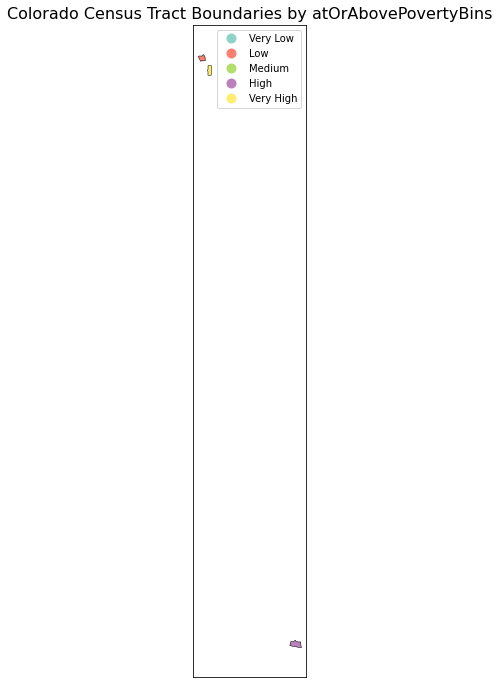

In [92]:
for col in binColumns:
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    mergedTableBounds.plot(
        column = col, 
        ax = ax, 
        cmap='Set3', 
        edgecolor='black', 
        linewidth=0.5,
        legend = True,
        categorical = True)

    ax.set_title(f"Colorado Census Tract Boundaries by {col}", fontsize=16)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    plt.show()

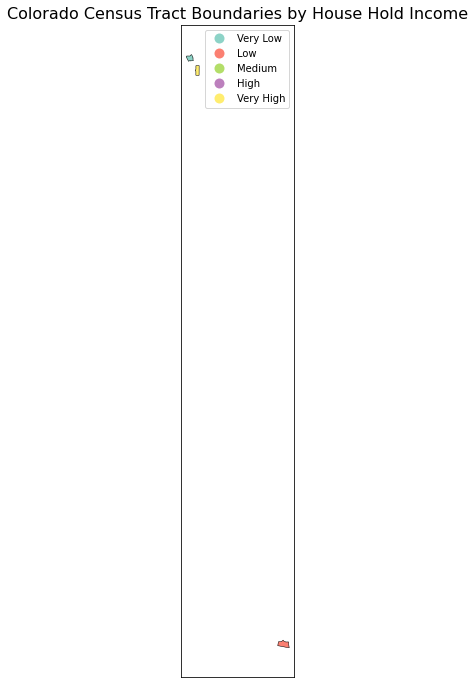

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
mergedTableBounds.plot(
    column = 'householdIncomeBins', 
    ax = ax, 
    cmap='Set3', 
    edgecolor='black', 
    linewidth=0.5,
    legend = True,
    categorical = True)

ax.set_title("Colorado Census Tract Boundaries by House Hold Income", fontsize=16)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()
